<h1 align='center'> FIFA Team<h1>


### Importing Librarires

In [2]:
import numpy as np 
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
!pip install WordCloud
from wordcloud import WordCloud

### Loading Dataset

In [5]:
df=pd.read_csv("FiFa.csv")

In [6]:
from IPython.core.display import HTML

# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [7]:
pd.set_option('display.max_colwidth', -1)
df_1=df.head(2)
HTML(df_1.to_html(escape=False ,formatters=dict(Photo=path_to_image_html,Flag=path_to_image_html)))


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,,Argentina,,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,,Portugal,,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


#### Shape of the dataset

In [8]:
df.shape

(18207, 89)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#### Check Null values in different columns

In [10]:
df.isnull().sum()

Unnamed: 0                  0    
ID                          0    
Name                        0    
Age                         0    
Photo                       0    
Nationality                 0    
Flag                        0    
Overall                     0    
Potential                   0    
Club                        241  
Club Logo                   0    
Value                       0    
Wage                        0    
Special                     0    
Preferred Foot              48   
International Reputation    48   
Weak Foot                   48   
Skill Moves                 48   
Work Rate                   48   
Body Type                   48   
Real Face                   48   
Position                    60   
Jersey Number               60   
Joined                      1553 
Loaned From                 16943
Contract Valid Until        289  
Height                      48   
Weight                      48   
LS                          2085 
ST            

### Columns Names

In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Correlation between different features

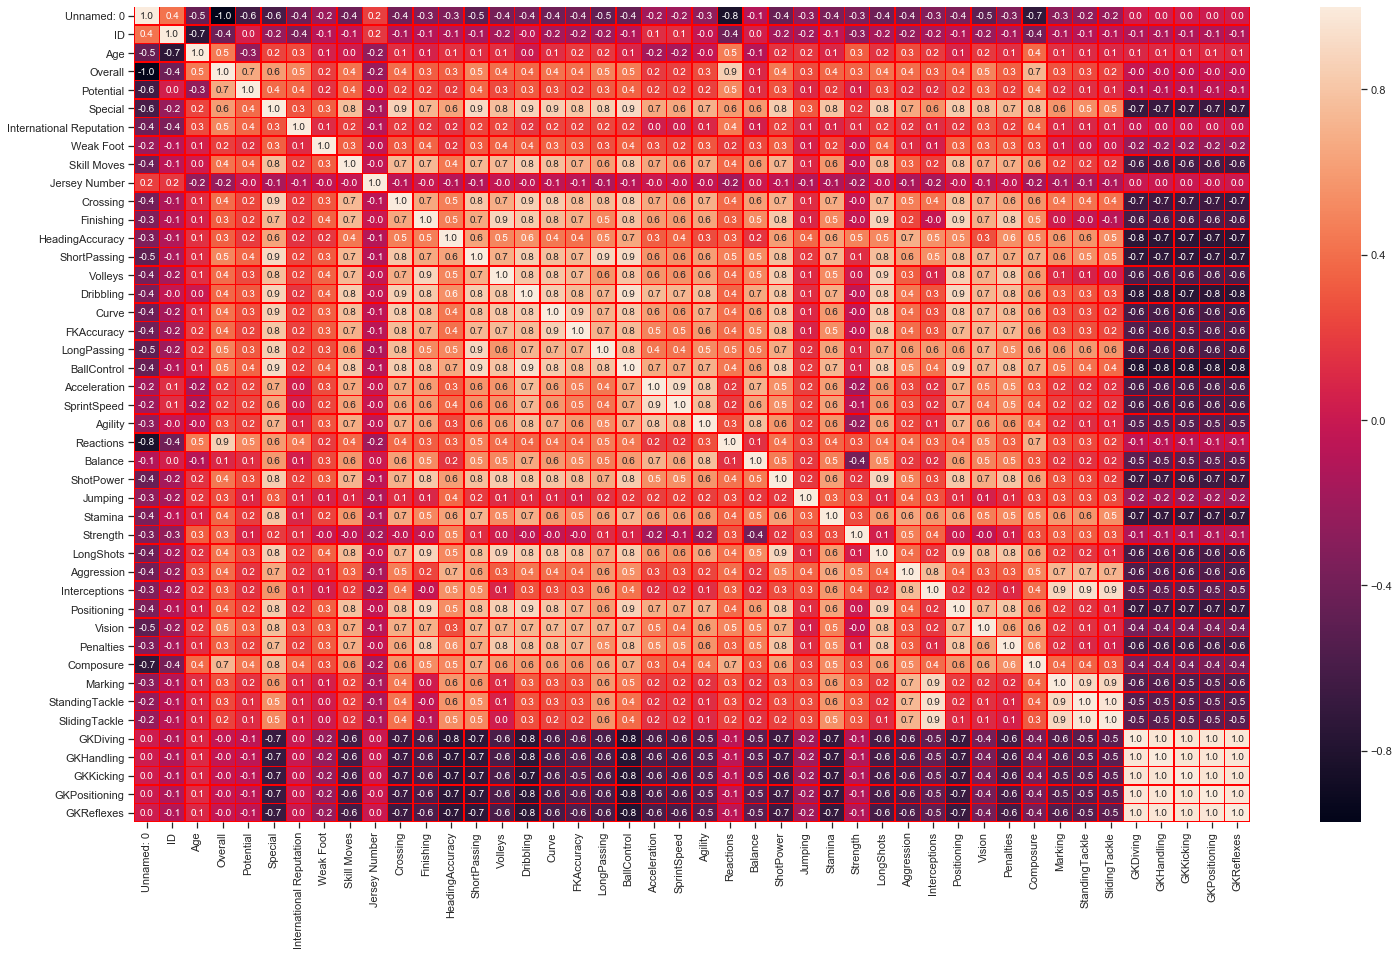

In [12]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

### Strongest & Weakest Players in Overall Score

In [13]:
df_strongest=df[["Name","Photo","Age","Overall","Value","Club","Nationality"]][df["Overall"]==df["Overall"].max()]

HTML(df_strongest.to_html(escape=False ,formatters=dict(Photo=path_to_image_html)))

,Name,Photo,Age,Overall,Value,Club,Nationality
0,L. Messi,,31,94,€110.5M,FC Barcelona,Argentina
1,Cristiano Ronaldo,,33,94,€77M,Juventus,Portugal


In [14]:
df_weakest=df[["Name","Photo","Age","Overall","Value","Club","Nationality"]][df["Overall"]==df["Overall"].min()]

HTML(df_weakest.to_html(escape=False ,formatters=dict(Photo=path_to_image_html)))

,Name,Photo,Age,Overall,Value,Club,Nationality
18206,G. Nugent,,16,46,€60K,Tranmere Rovers,England


Some players cannot be visualized since URLs are broken for them

## Nationality

Nationality Text Size = Nationality Player Count

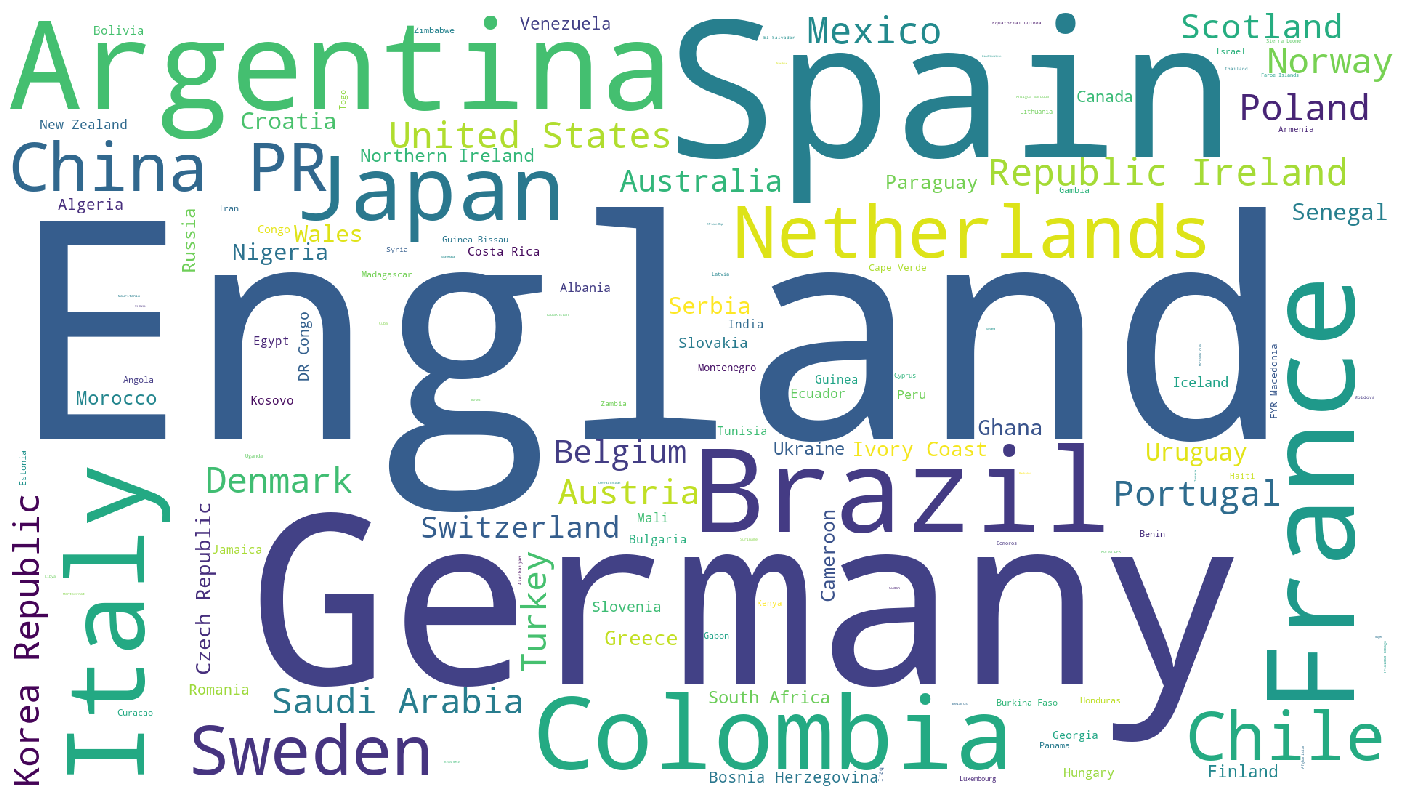

In [15]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('nationality.png')
plt.show()

## Fillinng and removing Null values

### Imputing Club and Position

In [16]:
df['Club'].fillna('No Club', inplace = True)
df['Position'].fillna('ST', inplace = True)

### Imputing via mean for numerical variables

In [17]:
impute_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]


In [18]:
for i in impute_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

### Imputing via mode for categorical values 

In [19]:
impute_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in impute_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

### Imputing via mode for Discrete or Continous Numerical values

In [20]:
impute_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in impute_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

### Columns remaining to be imputed

In [21]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

#### Replace remaining columns by 0

In [22]:
df.fillna(0, inplace = True)

## Converting Wage, Value and Release Clauses into Numerical Values

In [23]:
keys=["Wage","Value","Release Clause"]
df_num = df.copy(deep=True)

for key in keys:
    df_num[key + "_Currency"] = df_num[key].str[:1]
    df_num[key + "_Multiplier"] = df_num[key].str[-1:]
    df_num[key] = df_num[key].replace('[\€,]', '', regex=True)
    df_num[key] = df_num[key].replace('[K,]', '', regex=True)
    df_num[key] = df_num[key].replace('[M,]', '', regex=True)

In [24]:
  
print(df_num["Wage_Currency"].unique(),
     df_num["Value_Currency"].unique(),
     df_num["Release Clause_Currency"].unique())

['€'] ['€'] ['€' nan]


In [25]:
print(df_num["Wage_Multiplier"].unique(),
     df_num["Value_Multiplier"].unique(),
     df_num["Release Clause_Multiplier"].unique())

['K' '0'] ['M' '0' 'K'] ['M' nan 'K']


In [26]:
df_num[["Wage_Currency","Wage_Multiplier","Wage","Value","Value_Currency","Value_Multiplier","Release Clause",
       "Release Clause_Currency","Release Clause_Multiplier"]].head()

,Wage_Currency,Wage_Multiplier,Wage,Value,Value_Currency,Value_Multiplier,Release Clause,Release Clause_Currency,Release Clause_Multiplier
0,€,K,565,110.5,€,M,226.5,€,M
1,€,K,405,77,€,M,127.1,€,M
2,€,K,290,118.5,€,M,228.1,€,M
3,€,K,260,72,€,M,138.6,€,M
4,€,K,355,102,€,M,196.4,€,M


In [27]:
df_num.shape

(18207, 95)

In [28]:
for key in keys:
    df_num[key]=df_num[key].astype(float)

for key in keys:
    df_num[key + "_Multiplier"] = df_num[key + "_Multiplier"].replace('[K,]', '1000', regex=True)
    df_num[key + "_Multiplier"] = df_num[key + "_Multiplier"].replace('[M,]', '1000000', regex=True)
    df_num[key + "_Multiplier"] = df_num[key + "_Multiplier"].astype(float)

In [29]:
keys=["Wage","Value","Release Clause"]

for key in keys:
    df[key + "_Numeric"] = df_num[key]*df_num[key + "_Multiplier"]

In [30]:
from tabulate import tabulate

print(tabulate(df[["Name","Wage","Wage_Numeric","Value","Value_Numeric"]].head(3) \
               .append(df[["Name","Wage","Wage_Numeric","Value","Value_Numeric"]].tail(3)), 
               headers='keys', tablefmt='grid',numalign="right",floatfmt=".0f"))

+-------+-------------------+--------+----------------+---------+-----------------+
|       | Name              | Wage   |   Wage_Numeric | Value   |   Value_Numeric |
+=======+===================+========+================+=========+=================+
|     0 | L. Messi          | €565K  |         565000 | €110.5M |       110500000 |
+-------+-------------------+--------+----------------+---------+-----------------+
|     1 | Cristiano Ronaldo | €405K  |         405000 | €77M    |        77000000 |
+-------+-------------------+--------+----------------+---------+-----------------+
|     2 | Neymar Jr         | €290K  |         290000 | €118.5M |       118500000 |
+-------+-------------------+--------+----------------+---------+-----------------+
| 18204 | B. Worman         | €1K    |           1000 | €60K    |           60000 |
+-------+-------------------+--------+----------------+---------+-----------------+
| 18205 | D. Walker-Rice    | €1K    |           1000 | €60K    |           

### Generalizing diff. features in a core features

In [31]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))   #Why we use two means?

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

### Adding these categories to the data

In [ ]:
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

### Renaming a column

In [ ]:
df.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

## Data Visualization

### Define a DataFrame for core features of players

In [ ]:
players = df[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head(1)

### Different positions acquired by the players 

In [ ]:
plt.figure(figsize = (18, 8))
sns.set(style="ticks")
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

### Players on the Basis of Height

In [ ]:
plt.figure(figsize = (13, 8))
sns.set(style="ticks")
ax = sns.countplot(x = 'Height', data = df, palette = 'bone')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


### Different Work rate of the players

In [ ]:
plt.figure(figsize = (15, 7))
sns.set(style="ticks")
sns.countplot(x = 'Work Rate', data = df, palette = 'plasma')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()


### Speciality Scores of Players

In [ ]:
x = df.Special
plt.figure(figsize = (12, 8))
sns.set(style="ticks")
ax = sns.distplot(x, bins = 58, kde = False, color = 'cyan')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

### Different Nations' Players and their Overall Scores

In [ ]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']]
plt.rcParams['figure.figsize'] = (15, 7)
sns.set(style="ticks")
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

### Count of Different Clubs

In [ ]:
df['Club'].value_counts().head(10)

In [ ]:
data = df.copy()

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(style="ticks")

### Distribution of Overall Score in Different popular Clubs

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Top 10 left footed footballers

In [ ]:
left = data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)
left

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(left.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('left.png')
plt.show()

### Top 10 Right footed footballers

In [ ]:
right = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)
right

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('right.png')
plt.show()

### Comparison the performance of left-footed and right-footed footballers on BallControl and Dribbing

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

In [ ]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

In [ ]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### Player with maximum Potential and Overall Performance

In [ ]:
player = str(df.loc[df['Potential'].idxmax()][1])
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

## Best Players

1. ### Best Players for each country

In [ ]:
idx = df.groupby(['Nationality'])['Overall'].transform(max) == df['Overall']
HTML(df[idx].head().to_html(escape=False ,formatters=dict(Photo=path_to_image_html,Flag=path_to_image_html)))

In [ ]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

In [ ]:
i=0
best = []
while i < len(pr_cols):
    best.append(df.loc[df[pr_cols[i]].idxmax()][1])
    i +=1

In [ ]:
best

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(best))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('best.png')
plt.show()

## Sorting Clubs according to their mean Overall Score

In [ ]:
new_df_2 = df.groupby('Club', as_index=False)['Overall'].mean()
new_df_2 = new_df_2.sort_values(by=["Overall"],ascending=False)
new_df_2.head()
#new_df_2.shape

#### Scatter Plot for the randomly selected Clubs

In [ ]:
new_df_3 = new_df_2.sample(n=20)
new_df_3 = new_df_3.sort_values(by=["Overall"],ascending=False)

In [ ]:
f, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(x=new_df_3["Club"],y=new_df_3["Overall"],ax=ax)
plt.xticks(rotation='vertical')
plt.show()

###### Plotting a Swarm Plot for Spain, Argentina, Portugal and Turkey

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=df.loc[(df['Nationality'] == 'Spain') | (df["Nationality"] == 'Argentina') | \
                  (df["Nationality"] == 'Portugal') | (df["Nationality"] == 'Turkey') ]["Nationality"],
              y=df.loc[(df['Nationality'] == 'Spain') | (df["Nationality"] == 'Argentina') | \
                  (df["Nationality"] == 'Portugal') | (df["Nationality"] == 'Turkey') ]["Overall"])
plt.show()

## Plotting World Map vs Top Players for each Country

In [ ]:
idx = df.groupby(['Nationality'])['Overall'].transform(max) == df['Overall']

Max_Player = df[idx]

trace = [go.Choropleth(
            colorscale = 'plasma',
            locationmode = 'country names',
            locations = Max_Player['Nationality'],
            text = Max_Player['Name'],
            z = Max_Player['Overall'])]

layout = go.Layout(title = 'Nationality vs Their Top Players')


fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)